Bioinformatyka2 2022/2023, Adrian Kania, Ćwiczenia4

<h2> Biologiczne bazy danych oraz metoda TF-IDF do porównywania dokumentów tekstowych.

<h3> Protein Data Bank (PDB)

In [1]:
from urllib.request import urlopen #moduł żeby otworzyc URL

def downloadPDBasList(pdbId):
    response = urlopen(f'http://www.rcsb.org/pdb/files/{pdbId}.pdb') #otwieramy połączenie
    data = response.read().decode('utf-8') #sposob kodowania
    t = data.split('\n') #kazda linijka bedzie osobnym elementem listy
    return t

In [5]:
t = downloadPDBasList("1A12") #pobieramy białko o zadanym ID

#Wyświetlamy pierwsze 10 linijek
n = 0
for line in t:
    print(line)
    n += 1
    if n>10:
        break

HEADER    GUANINE NUCLEOTIDE EXCHANGE FACTOR      19-DEC-97   1A12              
TITLE     REGULATOR OF CHROMOSOME CONDENSATION (RCC1) OF HUMAN                  
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: REGULATOR OF CHROMOSOME CONDENSATION 1;                    
COMPND   3 CHAIN: A, B, C;                                                      
COMPND   4 FRAGMENT: FULL LENGTH;                                               
COMPND   5 SYNONYM: RCC1;                                                       
COMPND   6 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: HOMO SAPIENS;                                   
SOURCE   3 ORGANISM_COMMON: HUMAN;                                              


<h3> PubMed

<h4> Wyszukiwanie prac zadanego autora

In [6]:
from urllib.request import urlopen
from urllib.parse import urlencode 
from lxml import etree  #modul zeby otworzyc pliki XML

##########NASZE ZAPYTANIE
author_name = "Krzysztof Murzyn"
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
url = base_url+ urlencode({"db": "pubmed", "term": author_name+"[author]", "retmax": 30})  #db = database
#########################

#########OTWORZ URL I PRZECZYTAJ XML
response = urlopen(url)
resultxml = response.read()
xml = etree.XML(resultxml)
####################################

In [7]:
tags = list({elem.tag for elem in xml.iter()}) #Co mozemy sie dowiedziec?

print(tags)

['Id', 'From', 'To', 'Count', 'IdList', 'TranslationSet', 'TranslationStack', 'TermSet', 'Field', 'QueryTranslation', 'RetMax', 'eSearchResult', 'Translation', 'Explode', 'Term', 'OP', 'RetStart']


In [8]:
resultelements = xml.xpath("//Id") #wszystkie ID prac autora

for elem in resultelements:
    print([elem.text])

['35723299']
['32940993']
['30504221']
['27902406']
['26825705']
['26718149']
['25867074']
['25296168']
['24660117']
['24286298']
['23527010']
['22428146']
['22284390']
['20506323']
['19909337']
['19199693']
['17985365']
['20408622']
['16395663']
['15652158']
['15556990']
['14594994']
['14515159']
['12774216']


<h4> Wyszukiwanie pracy po ID

In [9]:
from urllib.request import urlopen
from lxml import etree

##########NASZE ZAPYTANIE
PMID = '33713823' #nr pracy
baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query = "db=pubmed&id="+PMID+"&format=xml"    
########################


#########OTWORZ URL I PRZECZYTAJ XML
url = baseurl+query
f = urlopen(url) 
resultxml = f.read() 
xml = etree.XML(resultxml) 
###################################

tags = list({elem.tag for elem in xml.iter()}) #co sie moge dowiedzieć o tej pracy?
print(tags)

['ISSN', 'ISOAbbreviation', 'Journal', 'MedlinePgn', 'Issue', 'PubmedArticleSet', 'Year', 'Title', 'ArticleIdList', 'AffiliationInfo', 'DateCompleted', 'PublicationType', 'Keyword', 'PublicationStatus', 'MedlineJournalInfo', 'MedlineTA', 'Day', 'KeywordList', 'DateRevised', 'Article', 'ArticleTitle', 'PubmedData', 'PublicationTypeList', 'NlmUniqueID', 'AbstractText', 'MeshHeading', 'PMID', 'Affiliation', 'Abstract', 'Volume', 'ELocationID', 'AuthorList', 'CitationSubset', 'History', 'JournalIssue', 'Month', 'ArticleDate', 'Pagination', 'Hour', 'Country', 'MeshHeadingList', 'ForeName', 'ArticleId', 'MedlineCitation', 'ISSNLinking', 'Initials', 'DescriptorName', 'PubDate', 'PubMedPubDate', 'Language', 'Minute', 'Author', 'LastName', 'PubmedArticle', 'CopyrightInformation']


In [36]:
#Zobacz tytul

resultelements= xml.xpath("//ArticleTitle") 

for element in resultelements:
    print(element.text)

The robustness of the chaos game representation to mutations and its application in free-alignment methods.


In [8]:
#Zobacz abstrakt

resultelements= xml.xpath("//AbstractText") 

for element in resultelements:
    print(element.text)

Numerical representation of biological sequences plays an important role in bioinformatics and has many practical applications. One of the most popular approaches is the chaos game representation. In this paper, the authors propose a novel look into chaos game construction - an analytical description of this procedure. This type enables to build more general number sequences using different weight functions. The authors suggest three conditions that these functions should hold. Additionally, they present some criteria to compare them and check whether they provide a unique representation. One of the most important advantages of our approach is the possibility to construct such a description that is less sensitive to mutations and as a result, give more reliable values for free-alignment phylogenetic trees constructions. Finally, the authors applied the DFT method using four types of functions and compared the obtained results using the BLAST tool.


<h4> Zadanie1: 
    
    Z bazy danych PubMed pobierz i zapisz do pliku wszystkie tytuły publikacji których autorem (lub współautorem) 
    jest Krzysztof Murzyn.
    
       
    
    Wskazówka::
    - pobierz IDs wszystkich prac,
    - pobierz wszystkie tytuły dla każdego ID (możesz zapisać je do listy)
    - zapisz dane do pliku tekstowego

<h4> Zadanie2: 
    
    Ile razy słowo "molecule" wystąpiło we wszystkich abstraktach prac autorstwa lub współautorstwa Krzysztofa Murzyna?

In [18]:
%%bash
pip install metapub

-bash: line 1: pip: command not found


CalledProcessError: Command 'b'pip install metapub\n'' returned non-zero exit status 127.

In [17]:
%%bash
!pip install metapub

from urllib.request import urlopen
from urllib.parse import urlencode 
from lxml import etree  #modul zeby otworzyc pliki XML

##########NASZE ZAPYTANIE
author_name = "Krzysztof Murzyn"
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
url = base_url+ urlencode({"db": "pubmed", "term": author_name+"[author]", "retmax": 30})  #db = database
#########################

#########OTWORZ URL I PRZECZYTAJ XML
response = urlopen(url)
resultxml = response.read()
xml = etree.XML(resultxml)
####################################

resultelements = xml.xpath("//Id") #wszystkie tytuły prac autora

pmid
for elem in resultelements:
    print([elem.text])
    
titles = {}
for pmid in pmids:
    titles[pmid] = fetch.article_by_pmid(pmid).title
Title = pd.DataFrame(list(titles.items()),columns = ['pmid','Title'])
Title



-bash: line 1: pip: command not found
from: can't read /var/mail/urllib.request
from: can't read /var/mail/urllib.parse
from: can't read /var/mail/lxml
-bash: line 8: author_name: command not found
-bash: line 9: base_url: command not found
-bash: line 10: syntax error near unexpected token `('
-bash: line 10: `url = base_url+ urlencode({"db": "pubmed", "term": author_name+"[author]", "retmax": 30})  #db = database'


CalledProcessError: Command 'b'pip install metapub\n\nfrom urllib.request import urlopen\nfrom urllib.parse import urlencode \nfrom lxml import etree  #modul zeby otworzyc pliki XML\n\n##########NASZE ZAPYTANIE\nauthor_name = "Krzysztof Murzyn"\nbase_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"\nurl = base_url+ urlencode({"db": "pubmed", "term": author_name+"[author]", "retmax": 30})  #db = database\n#########################\n\n#########OTWORZ URL I PRZECZYTAJ XML\nresponse = urlopen(url)\nresultxml = response.read()\nxml = etree.XML(resultxml)\n####################################\n\nresultelements = xml.xpath("//Id") #wszystkie tytu\xc5\x82y prac autora\n\npmid\nfor elem in resultelements:\n    print([elem.text])\n    \ntitles = {}\nfor pmid in pmids:\n    titles[pmid] = fetch.article_by_pmid(pmid).title\nTitle = pd.DataFrame(list(titles.items()),columns = [\'pmid\',\'Title\'])\nTitle\n\n'' returned non-zero exit status 2.

<h3> Nucleotide

In [11]:
from urllib.request import urlopen
from lxml import etree


##########NASZE ZAPYTANIE
ID = 'U20285.2' # id sekwencji
baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query = "db=nucleotide&id="+ID+"&format=xml" 
url = baseurl+query
########################

#########OTWORZ URL I PRZECZYTAJ XML
f = urlopen(url) 
resultxml = f.read() 
xml = etree.XML(resultxml) 
###################################

In [17]:
tags = list({elem.tag for elem in xml.iter()}) #co sie mogę dowiedziec o tej sekwencji?

print(tags)

['GBSeq', 'GBInterval_accession', 'GBReference', 'GBSeq_primary-accession', 'GBSeq_definition', 'GBReference_reference', 'GBSeq_moltype', 'GBSeq_topology', 'GBInterval', 'GBInterval_to', 'GBQualifier_name', 'GBReference_journal', 'GBReference_title', 'GBFeature_quals', 'GBAuthor', 'GBReference_remark', 'GBReference_authors', 'GBSeq_sequence', 'GBFeature_location', 'GBSeq_organism', 'GBQualifier', 'GBQualifier_value', 'GBSeq_taxonomy', 'GBSeq_create-date', 'GBInterval_point', 'GBSeq_length', 'GBFeature', 'GBSeq_accession-version', 'GBSeq_feature-table', 'GBSet', 'GBSeq_update-date', 'GBSeq_division', 'GBFeature_key', 'GBSeq_other-seqids', 'GBInterval_from', 'GBSeq_locus', 'GBReference_pubmed', 'GBFeature_intervals', 'GBSeq_comment', 'GBSeq_references', 'GBReference_position', 'GBSeqid', 'GBSeq_source', 'GBSeq_strandedness']


In [45]:
resultelements = xml.xpath("//GBSeq_sequence") #sekwencja

for element in resultelements:
    print(element.text)

tctctgaagttccagaatcgatggaagtggacggcacgccgcggcggggtgggtgcaagatgccgctgccggttcaggtgtttaacttgcagggggccgtggagcccatgcagatcgacgtggacccccaggaagacccgcagaatgcacctgacgtcaactacgtggtggagaaccccagcctggatctggaacagtacgcggccagctacagcggcctgatgcgcatcgaacggctgcagttcattgctgatcactgccccacgctgcgggtggaggccctgaagatggccctctccttcgtgcagagaacctttaacgtggacatgtacgaggagatccaccgcaagctctcagaggccaccagggagctgcagaacgcacccgacgccatccctgagagcggcgtggagcccccagccctggacacggcctgggtggaggccacgcggaagaaggcgctgctgaagctggagaagctggacacagacctgaagaactacaagggcaactccatcaaagagagcatccggcgcggccacgacgacctgggcgaccactacctggactgtggggacctcagcaacgccctcaagtgctattcccgggcccgggactactgcaccagcgccaaacacgtcatcaacatgtgcctcaatgtcatcaaggtcagcgtctacttgcagaattggtctcatgtgctcagctacgtcagcaaggctgagtccaccccagagattgccgagcagcgaggagagcgtgacagccagacccaggccatcctcaccaagctcaagtgtgccgcaggcttggcagagctggccgccaggaagtacaagcaggctgccaagtgcctcctgctggcttcctttgatcactgtgacttccctgagctgctgtcccccagcaacgtggccatctacggtggcctgtgcgccttggctacctttgaccggcaggagctgcagcgcaatgtcatctccagcagctccttcaagtt

<h4> Zadanie3: 
    
    Z bazy Nucleotide pobierz sekwencje o następującach ID: NM_001012006.1, MK560199.1, AB046569.1. 
    
    Zapisz je do pliku w formacie FASTA, gdzie nazwa odpowiada organizmowi z którego dana sekwencja pochodzi 
    [GBSeq_organism], natomiast sama sekwencja znajduje się w [GBSeq_sequence]

<h3>PubChem

<h4> Szukamy synonimów słowa aspiryna

In [12]:
from urllib.request import urlopen
from lxml import etree

In [13]:
#zapytanie/pobranie i odczytanie pliku XML
query = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/synonyms/XML"
response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)

In [14]:
synonyms = []
for elem in tree.iter():
    if elem.tag == "{http://pubchem.ncbi.nlm.nih.gov/pug_rest}Synonym":
        synonyms.append(elem.text)

In [15]:
print(synonyms[:10]) #pierwsze 10 synonimow

['aspirin', 'ACETYLSALICYLIC ACID', '50-78-2', '2-Acetoxybenzoic acid', '2-(Acetyloxy)benzoic acid', 'O-Acetylsalicylic acid', 'o-Acetoxybenzoic acid', 'Acylpyrin', 'Easprin', 'Ecotrin']


<h4> Pobieranie struktury związków chemicznych w oparciu o format SMILES

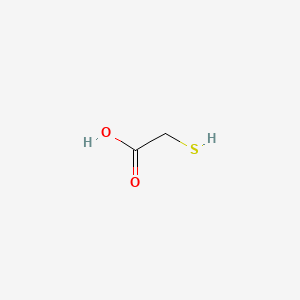

In [54]:
from urllib.request import urlretrieve
from IPython.display import Image  #do wyswietlania obrazka

smiles = 'C(=O)(O)CS'
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

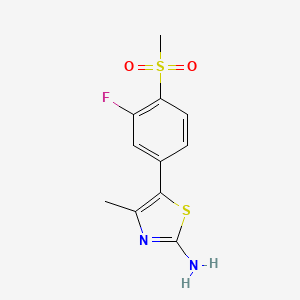

In [17]:
from urllib.request import urlretrieve
from IPython.display import Image  #do wyswietlania obrazka

smiles = 'NC1=NC(C)=C(C2=CC=C(S(=O)(C)=O)C(F)=C2)S1'
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

<h4> Pobieranie struktury związków chemicznych w oparciu o nazwę związku

In [18]:
from urllib.request import urlopen
from lxml import etree

#zapytanie/pobranie i odczytanie pliku XML
query = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/XML"
response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)

In [19]:
tags = list({elem.tag for elem in tree.iter()})

print(tags[:4])

['{http://www.ncbi.nlm.nih.gov}PC-DrawAnnotations_aid1_E', '{http://www.ncbi.nlm.nih.gov}PC-Count_atom-chiral-def', '{http://www.ncbi.nlm.nih.gov}PC-Compound', '{http://www.ncbi.nlm.nih.gov}PC-Compound_atoms']


In [20]:
sek = []
for element in tree.iter():
    if element.tag == "{http://www.ncbi.nlm.nih.gov}PC-InfoData_value_sval":
        sek.append(element.text)

In [21]:
print(sek)

['2-acetoxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetyloxybenzoic acid', '2-acetoxybenzoic acid', 'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)', 'BSYNRYMUTXBXSQ-UHFFFAOYSA-N', '180.04225873', 'C9H8O4', '180.16', 'CC(=O)OC1=CC=CC=C1C(=O)O', 'CC(=O)OC1=CC=CC=C1C(=O)O', '180.04225873']


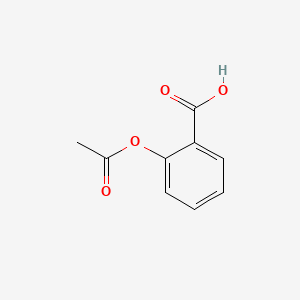

In [24]:
#Rysuje strukture aspiryny w oparciu o SMILES

from urllib.request import urlretrieve
from IPython.display import Image


smiles = sek[-2] #bo przedostatni element powyzszej listy zawieral format SMILES
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

<h4> Zadanie4: 
    
    Pobierz w formacie SMILES informację o strukturze Lopinavir'u (inhibiora proteazy HIV). 
    
    Jeżeli to możliwe, wykonaj wizualizaję tej struktury.

<h2> Term Frequency — Inverse Document Frequency (TF-IDF) czyli zliczanie słów w dokumentach

In [27]:
documents = ["new york times", "new york post", "los angeles times"]

N = len(documents)
N

3

In [26]:
bg = [x.split(' ') for x in documents]

print(bg)

[['new', 'york', 'times'], ['new', 'york', 'post'], ['los', 'angeles', 'times']]


In [27]:
unique_words = set(sum(bg, []))

print(unique_words)

{'los', 'york', 'post', 'angeles', 'new', 'times'}


In [28]:
num_of_words = []

for i in range(N):
    nw = dict.fromkeys(unique_words,0)
    for word in bg[i]:
        nw[word]+=1
        
    num_of_words+=[nw]

print(num_of_words)

[{'los': 0, 'york': 1, 'post': 0, 'angeles': 0, 'new': 1, 'times': 1}, {'los': 0, 'york': 1, 'post': 1, 'angeles': 0, 'new': 1, 'times': 0}, {'los': 1, 'york': 0, 'post': 0, 'angeles': 1, 'new': 0, 'times': 1}]


In [29]:
def computeTF(wordDict):
    tfDict = {}
    M = wordDict.values()
    for word, count in wordDict.items():
        tfDict[word] = count/max(M)
    return tfDict

In [30]:
tf = [computeTF(num_of_words[i]) for i in range(len(bg))]

print(tf)

[{'los': 0.0, 'york': 1.0, 'post': 0.0, 'angeles': 0.0, 'new': 1.0, 'times': 1.0}, {'los': 0.0, 'york': 1.0, 'post': 1.0, 'angeles': 0.0, 'new': 1.0, 'times': 0.0}, {'los': 1.0, 'york': 0.0, 'post': 0.0, 'angeles': 1.0, 'new': 0.0, 'times': 1.0}]


In [31]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(),0)
    for document in documents:
        for word, val in document.items():
            if val>0:
                idfDict[word]+=1
    for word, val in idfDict.items():
        idfDict[word] = math.log2(N/float(val))
    return idfDict

In [32]:
idfs = computeIDF(num_of_words)

print(idfs)

{'los': 1.584962500721156, 'york': 0.5849625007211562, 'post': 1.584962500721156, 'angeles': 1.584962500721156, 'new': 0.5849625007211562, 'times': 0.5849625007211562}


In [33]:
def computeTFIDF(tfBag, idfs):
    tfidf = {}
    for word, val in tfBag.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [34]:
import pandas as pd #biblioteka do tworzenia ramek danych i operacji na nich

df = pd.DataFrame([computeTFIDF(tf[i], idfs) for i in range(N)])
print(df)

        los      york      post   angeles       new     times
0  0.000000  0.584963  0.000000  0.000000  0.584963  0.584963
1  0.000000  0.584963  1.584963  0.000000  0.584963  0.000000
2  1.584963  0.000000  0.000000  1.584963  0.000000  0.584963


In [35]:
df.iloc[0] #zerowy wiersz

los        0.000000
york       0.584963
post       0.000000
angeles    0.000000
new        0.584963
times      0.584963
Name: 0, dtype: float64

In [36]:
df.columns #nazwy kolumn

Index(['los', 'york', 'post', 'angeles', 'new', 'times'], dtype='object')

In [37]:
#powyzsze funkcjonalnosci TF-IDF spakowalem w postaci modułu

import binf2 as b

df = b.TFIDF(documents, True)
print(df)

        los      york      post   angeles       new     times
0  0.000000  0.584963  0.000000  0.000000  0.584963  0.584963
1  0.000000  0.584963  1.584963  0.000000  0.584963  0.000000
2  1.584963  0.000000  0.000000  1.584963  0.000000  0.584963


<h4> Miara cosinusowa

$cos(\alpha) = \frac{<x,y>}{|x||y|}$

In [38]:
def cos_measure(x,y):
    import numpy as np
    return np.sum(x*y)/(np.sqrt(sum(x**2))*np.sqrt(sum(y**2)))

In [39]:
cos_measure(df.iloc[0], df.iloc[1]), cos_measure(df.iloc[0], df.iloc[2]), cos_measure(df.iloc[1], df.iloc[2])  #odleglosc pomiedzy 0 i 1, 0 i 2 oraz 1 i 2 tekstem

(0.3778002039938994, 0.14578946632810497, 0.0)

In [40]:
from sklearn.metrics.pairwise import cosine_similarity #laduje biblioteke do wyznaczenia macierzy podobienstw
import pandas as pd

similarity_matrix = cosine_similarity(b.TFIDF(documents, True)) #tworze macierz podobienstw pomiedzy dokumentami
similarity_df = pd.DataFrame(similarity_matrix)  #przerabiam na ramke danych
similarity_df

,0,1,2
0,1.000000,0.3778,0.145789
1,0.377800,1.0000,0.000000
2,0.145789,0.0000,1.000000


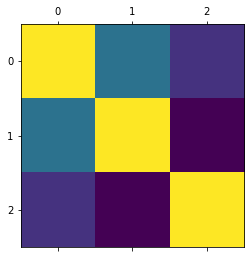

In [42]:
import matplotlib.pyplot as plt #biblioteka do rysowania

plt.matshow(similarity_df)
plt.show()

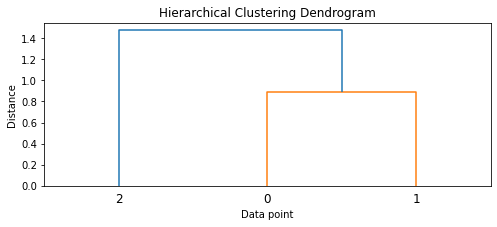

In [43]:
#topologia zależnosci pomiędzy dokumentami na podstawie podobieństw kosinusowych

from scipy.cluster.hierarchy import dendrogram, linkage  #przygotowanie do rysowania drzewka ponizej
import matplotlib.pyplot as plt  #biblioteka do rysowania

Z = linkage(similarity_matrix, 'ward') #na podstawie odleglosci wyzej wyznaczam topologie drzewka w oparciu o metode Warda (klasteryzacja hierarchiczna)


plt.figure(figsize=(8, 3))  #wymiar obrazka
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

<h4> Nowe zapytanie

In [44]:
# nowe zapytanie (nowy dokument)
import re

new_doc  = "new new times"

new_docTF = computeTF({x: len(re.findall('(?='+x+')', new_doc)) for x in df.columns})
new_docTFIDF = computeTFIDF(new_docTF, idfs)

In [45]:
new_docTFIDF

{'los': 0.0,
 'york': 0.0,
 'post': 0.0,
 'angeles': 0.0,
 'new': 0.5849625007211562,
 'times': 0.2924812503605781}

In [46]:
df2 = df.append(new_docTFIDF , ignore_index = True) #dołączam nowy dokument na koncu
df2

,los,york,post,angeles,new,times
0,0.000000,0.584963,0.000000,0.000000,0.584963,0.584963
1,0.000000,0.584963,1.584963,0.000000,0.584963,0.000000
2,1.584963,0.000000,0.000000,1.584963,0.000000,0.584963
3,0.000000,0.000000,0.000000,0.000000,0.584963,0.292481


In [47]:
#podobieństwa cosinusowe nowego dokumentu (3) od pozostalych
[cos_measure(df2.iloc[i], df2.iloc[3]) for i in range(3)] #do ktorego z nich jest najbardziej podobny?

[0.7745966692414834, 0.29264277965242746, 0.11292803502824349]

<h2> Principal component analysis (PCA) - czyli redukcja i wizualizacja danych w 2D

In [48]:
from sklearn.preprocessing import StandardScaler #Biblioteka do standaryzacji danych
sc = StandardScaler() #standaryzacja danych
Xs = sc.fit_transform(df2)

In [49]:
#PCA jest algorytmem do redukcji ilosci zmiennych  (w tym przypadku chodzi o zmniejszeniu 4 kolumn do dwoch)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xs)
X_pca = pca.transform(Xs)

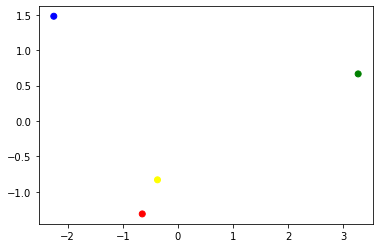

In [50]:
import matplotlib.pyplot as plt #biblioteka do rysowania wwykresow

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=1, c=["red", "blue", "green", "yellow"])
plt.show()

<h4> Zadanie5: 
    
    Otwórz plik prace.txt zawierający ID wybranych prac z PubMed. Pobierz MeshTerms'y (TAG: DescriptorName) dla każdej pracy.
    Prace dotyczą 3 tematyk (po 18 prac na jedną tematykę).
    
    Efektem powinna być lista list meshtermsów. 
    
    Następnie, używając metody TF-IDF i podobieństwa cosinusowego zwizualizuj podobieństwo pomiędzy pracami (narysuj
    macierz). 
    
    Możesz dodatkowo zastosować metodę PCA do redukcji wymiaru i tym samym zaprezentować wyniki w postaci 2D. Skomentuj  
    otrzymane wyniki.

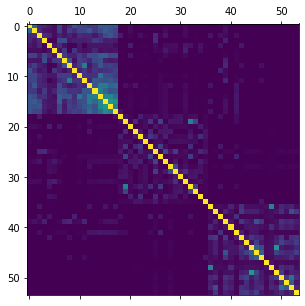

In [69]:
#tak powinna wygladac macierz podobienstw

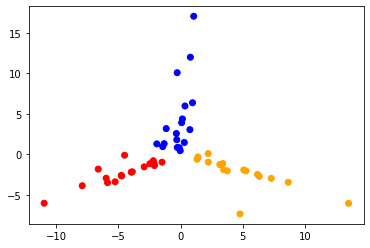

In [70]:
#tak moze wygladac wykres po zastosowaniu PCA

In [ ]:
#przy pobieraniu duzej liczby rekordow warto zastosowac time.sleep(1) z modulu time